In [ ]:
import numpy as np

In [ ]:
def PolyKernelMatrix(d):
  kernel_mat = []
  for i in range(len(df)):
    ker = []
    for j in range(len(df)):
      val=0
      for k  in range(df.shape[1]):
        val = val+df.iloc[i][k] * df.iloc[j][k]
        # print(df.iloc[i][k] * df.iloc[j][k]  + 1)
      val=val+1
      val=val**d
      ker.append(val)
        # print(x[i][k] , xt[k][j])
      # print('mul ', mul)
    kernel_mat.append(ker)
  kernel = pd.DataFrame(kernel_mat)
  return kernel

In [ ]:
def Exponential_Kernel(sigma):
  kernel_ex = []
  for i in range(len(df)):
    ex1 = []
    for j in range(len(df)):
      a, b = df.iloc[i], df.iloc[j]
      # print(a,b)
      X = np.subtract(a,b)
      X_T = np.transpose(X)
      # print(X.shape, X_T.shape)
      num = np.dot(X,X_T)
      den = 2 * sigma * sigma
      ex1.append(num/den)
    kernel_ex.append(ex1)
  kernel_ex = np.array(kernel_ex)
  kernel_ex = np.negative(kernel_ex)
  kernel_ex = np.exp(kernel_ex)
  return kernel_ex

In [ ]:
## Computing the Identity Matrix.
def IdentityMatrix(n):
  I = []
  for i in range(n):
    I_n = []
    for j in range(n):
      if i == j:
        I_n.append(1)
      else:
        I_n.append(0)
    I.append(I_n)
  return I
## Computing the Indicator Matrix
def IndicatorMatrix(n):
  num  = 1 / len(df)
  In = []
  for i in range(len(df)):
    In1 = []
    for j in range(len(df)):
      In1.append(num)
    In.append(In1)
  return In
#Computing I1 = (I-In)
def SubtractMatrix(I,n,In):
  I1 = []
  for i in range(n):
    I11 = []
    for j in range(n):
      I11.append(I[i][j] - In[i][j])
    I1.append(I11)
  return I1


In [ ]:
def CenterKernel(kernel):
  n = len(kernel)
  I = IdentityMatrix(n)
  In = IndicatorMatrix(n)
  I1 = np.subtract(I, In)
  I2 = np.matmul(I1,kernel)
  I2 = np.matmul(I2,I1)
  return I2

In [ ]:
#Sorting the Eigen vectors in decresing order of the corresponding Eigen Valules.
def ComputeEigens(kernel_ex):
  eigenvalues, eigenvectors = np.linalg.eig(kernel_ex)
  idx = eigenvalues.argsort()[::-1]
  eigenvalues = eigenvalues[idx]
  # print(eigenvalues)
  eigenvectors = eigenvectors[:,idx]
  # print(eigenvectors)
  import math
  H = []
  EV1 = eigenvectors[0]
  EV2 = eigenvectors[1]
  EV3 = eigenvectors[2]
  EV4 = eigenvectors[3]
  EV1 = EV1.tolist()
  EV2 = EV2.tolist()
  EV3 = EV3.tolist()
  EV4 = EV4.tolist()

  value1 = eigenvalues[0]
  value2 = eigenvalues[1]
  value3 = eigenvalues[2]
  value4 = eigenvalues[3]


  H.append(EV1)
  H.append(EV2)
  H.append(EV3)
  H.append(EV4)
  H = np.transpose(H)
  norm = []
  # Normalising the Eigen Vectors row-wise
  for i in range(len(H)):
    sum = 0
    for j in range(4):
      sum = sum + H[i][j]*H[i][j]
    norm.append(sum)

  norm = np.array(norm)
  norm = np.sqrt(norm)
  for i in range(len(H)):
    sum = 0
    for j in range(4):
      H[i][j] = H[i][j] / norm[i]
  return H


In [ ]:
import pandas as pd
import numpy as np

#Connecting to the Google Drive.
from google.colab import drive
drive.mount('/content/drive')

#Reading the data.
url = '/content/drive/MyDrive/Colab Notebooks/Dataset.csv'
df=pd.read_csv(url)
# df._get_value(0 , 'A')

df

Mounted at /content/drive


,A,B
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


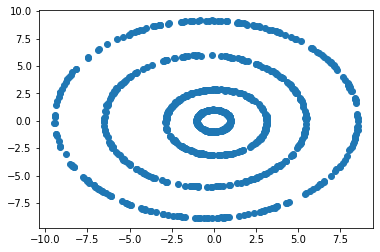

In [ ]:
#Plotting the original Graph
import matplotlib.pyplot as plt
plt.scatter(df['A'], df['B'])

In [ ]:
#Initialization
def Initialization(df,Z, k):
  import random
  centroid = []
  # print(Z)
  for i in range(k):
    r = random.randint(0,len(df))
    Z[r] = i+1
    centroid.append(df.iloc[r])
    # print(r)
  return Z , centroid

In [ ]:
def EuclideanDist (A , B):
  sum = 0
  for i in range(len(A)):
    diff = A[i] - B[i]
    diff = diff**2
    sum = sum + diff
  return sum


In [ ]:
def CalculateMean(centroid ,Z ,k):
    m = len(centroid[0])
    # print(m)
    centroid = np.zeros((k,m))
    Times = np.zeros(k)
    for i in range(len(df)):
      for j in range(k):
        if Z[i] == (j+1):
          centroid[j] = np.add(centroid[j], df.iloc[i])
          Times[j] = Times[j] + 1
    for j in range(k):
      centroid[j] = np.multiply(centroid[j] , 1 / Times[j])
    return centroid


In [ ]:
def Reassignment(centroid , Z , k):
  isReassign = False
  for i in range(len(df)):
    if Z[i] == 0:
      dist = float(np.Inf)
    else:
      dist = EuclideanDist(centroid[int(Z[i]) - 1], df.iloc[i])
    for j in range(k):
      ED  = EuclideanDist(centroid[j] , df.iloc[i])
      if dist > ED:
        isReassign = True
        dist = ED
        Z[i] = j+1
  return Z ,isReassign

In [ ]:
def PlotGraph(k,df,Z):
  colour = ['Red', 'Green' , 'Cyan' , 'Black' , 'Blue']
  import matplotlib.pyplot as plt
  # print(colour)
  Plot =  []
  for i in range(0,k):
    Plot1 = []
    for j in range(len(df)):
      if Z[j] == i+1:
        Plot1.append(df.iloc[j])
    Plot1 = pd.DataFrame(Plot1)
    # print(Plot1)
    plt.title('Spectral Clustering')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.scatter(Plot1['A'] , Plot1['B'],color=colour[i])

In [ ]:
def ComputeError(Z , centroid, k):
  sum = 0
  for i in range(len(df)):
    for j in range(0,k):
      if Z[i] == j+1:
        sum = sum + EuclideanDist(df.iloc[i], centroid[j])
  return sum

In [ ]:
def PlotError(ErrorSum):
  Iter = []
  for i in range(len(ErrorSum)):
    Iter.append(i)
  plt.scatter(Iter,ErrorSum)
  plt.title('Error v/s Iteration')
  plt.xlabel('Error')
  plt.ylabel('No of Iterations')
  plt.show()

In [ ]:
def Clustering(k):
  Z = np.zeros(len(df))
  Z, centroid = Initialization(df,Z , k)
  ErrorSum = []
  centroid=CalculateMean(centroid, Z , k)
  Z,reassign=Reassignment(centroid,Z,k)
  ErrorSum.append(ComputeError(Z, centroid , k))
  centroid=CalculateMean(centroid, Z , k)
  while reassign:
    Z , reassign = Reassignment(centroid, Z, k)
    ErrorSum.append(ComputeError(Z, centroid , k))
    centroid=CalculateMean(centroid, Z , k)
  PlotError(ErrorSum)
  PlotGraph(k,df, Z)

**Spectral Clustering using Polynomial Kernel**

In [ ]:
d = 2
kernel = PolyKernelMatrix(d)

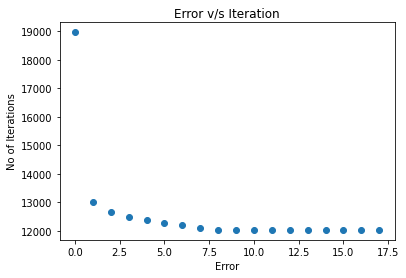

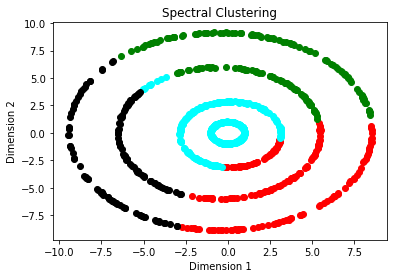

In [ ]:
kernel_c = CenterKernel(kernel)
H = ComputeEigens(kernel_c)
orig_df = df.copy()
df = pd.DataFrame(H)
Z = np.zeros(1000)
df = orig_df
k = 4
Z, centroid = Initialization(df,Z , k)
ErrorSum = []
centroid=CalculateMean(centroid, Z , k)
Z,reassign=Reassignment(centroid,Z,k)
ErrorSum.append(ComputeError(Z, centroid , k))
centroid=CalculateMean(centroid, Z , k)
while reassign:
  Z , reassign = Reassignment(centroid, Z, k)
  ErrorSum.append(ComputeError(Z, centroid , k))
  centroid=CalculateMean(centroid, Z , k)
PlotError(ErrorSum)
PlotGraph(k,df, Z)
plt.show()

**Spectral Clustering using Exponential Matrix sigma  = 0.1**


In [ ]:
sigma = 0.1
kernel = Exponential_Kernel(sigma)

           A        B
0    0.14300  0.98493
1   -0.30467  0.98562
2    0.46625 -0.84003
3    0.94847  0.37222
4   -0.96871 -0.26697
..       ...      ...
995  4.48210 -7.40030
996 -3.49630  8.63860
997  6.10620 -5.98640
998 -7.40940 -5.52050
999 -0.12948 -8.80360

[1000 rows x 2 columns]


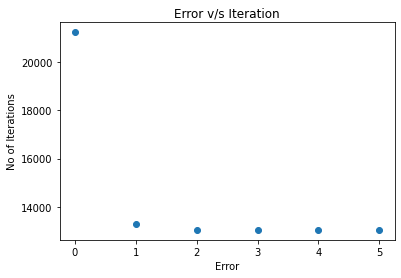

           A        B
0    0.14300  0.98493
1   -0.30467  0.98562
2    0.46625 -0.84003
3    0.94847  0.37222
4   -0.96871 -0.26697
..       ...      ...
995  4.48210 -7.40030
996 -3.49630  8.63860
997  6.10620 -5.98640
998 -7.40940 -5.52050
999 -0.12948 -8.80360

[1000 rows x 2 columns]


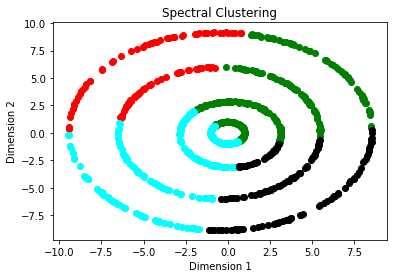

In [ ]:
kernel_c = CenterKernel(kernel)
H = ComputeEigens(kernel_c)
orig_df = df.copy()
print(orig_df)
df = pd.DataFrame(H)
Z = np.zeros(1000)
df = orig_df
k = 4
Z, centroid = Initialization(df,Z , k)
ErrorSum = []
centroid=CalculateMean(centroid, Z , k)
Z,reassign=Reassignment(centroid,Z,k)
ErrorSum.append(ComputeError(Z, centroid , k))
centroid=CalculateMean(centroid, Z , k)
while reassign:
  Z , reassign = Reassignment(centroid, Z, k)
  ErrorSum.append(ComputeError(Z, centroid , k))
  centroid=CalculateMean(centroid, Z , k)
PlotError(ErrorSum)
# df = orig_df.copy()
print(df)
PlotGraph(k,df, Z)
plt.show()